# Iris Logistic Regression Model

## Loading Data 

In [2]:
#Loading the Iris dataset 

from sklearn.datasets import load_iris
data=load_iris()

## Plotting Data 

To plot the data, I will need matplotlib, the iris dataset, mpl_toolkits, and the principal
component analysis tool. Matplotlib will allow me to plot the data using a scatter plot. Since I will need to create a 3D plot of the data as well, the mpl_toolkit function will allow me to acheieve this. Furthermore, the PCA tool will allow me to visualize the interrelations amoung the variables using the 3D plot. To start, I will need import the data from the iris dataset. After importing the data, I will need to select the features that will be plotted. I will be using "Sepal Length" and "Sepal Width" as my axes because these are used to determine the classification of each iris flower. The min and max equations will take all of the rows from each feature and adjust them by .5 to give a decision boundary and then plot them on the scatter plot. Moving onto to the 3D plot, setting the elev=-150 and azim=110 will adjust the view angle to get a better sense of the relationship between the three classifers. Color is added to both plots to represent each class of iris flower. Using the PCA function allows me to represent each of the 3 classes on the 3D plot and are labeled as eigenvectors because they are associated with the characteristics of each class of iris flower. 

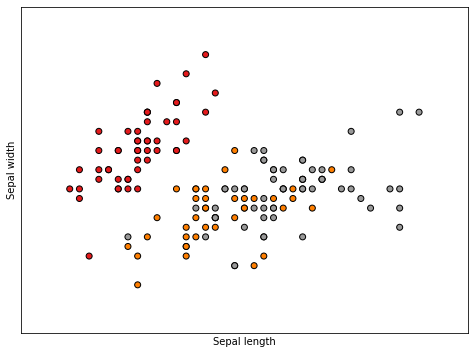

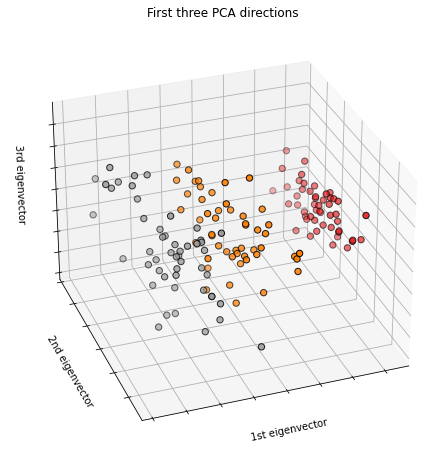

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

#Importing data from Iris dataset 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

#Plotting decision boundary 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length') # X axis label
plt.ylabel('Sepal width') # Y axis label

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plotting the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Splitting Data 

To split the data, I will need to import numpy and train_test_split. Using numpy will allow me to create an array that will be used to establish my training and testing datasets. The train_test_split function will help me carryout splitting the data. After creating the array that has a range of 10, shaped into 5 pairs of 2, I chose to have the data split into 2/3 train and 1/3 test because this should lead to a high level of accuracy once the model is run. If I increase the testing data, this will lower my accuracy, and if I decrease the testing data this might lead to overfitting as the model will be highly accurate on training data and won't be accurate when it comes to new data. Therefore, 1/3 testing data is ideal. 

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split #Importing train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X #printing the array 

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [3]:
list(y)

[0, 1, 2, 3, 4]

In [4]:
#Training the data to 2/3 of the dataset 

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [26]:
#Sending 2/3 of first observations to training data, the rest to testing.  

train_test_split(y, shuffle=False)

[[0, 1, 2], [3, 4]]

## Visualization of Data

The visualize the model using a scatter plot, matplotlib will be used again, along with numpy. I will need some sklearn tools such as accuracy_score, logisticregression, support vector classification, gaussianprocessclassifier, and radial basis function. After importing the data similar to when I originally plotted the data, I will need to use an RBF to work along the GPC. The center will defined as 10 to coincide with the range that I set earlier, and the kernel function will be used to help with the pattern analysis and GPC. After the kernel has been set, it be used to predict the classfiers, regression, and GPC outcomes and help determine their accuracy. Using the proba function, the propabilties of each X varible will be calculated and used in a probability chart that will compare their probabilitues at each class level. 

Automatically created module for IPython interactive environment
Accuracy (train) for L1 logistic: 82.7% 
Accuracy (train) for L2 logistic (Multinomial): 82.7% 
Accuracy (train) for L2 logistic (OvR): 79.3% 
Accuracy (train) for Linear SVC: 82.0% 
Accuracy (train) for GPC: 82.7% 


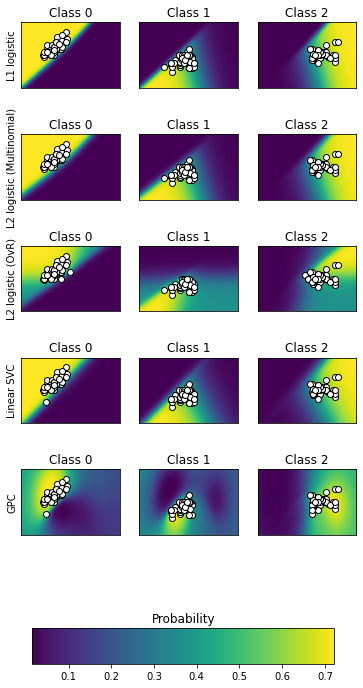

In [18]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets


#Loading data from Iris dataset 
iris = datasets.load_iris()
X = iris.data[:, 0:2]  # using the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                      random_state=0),
    'GPC': GaussianProcessClassifier(kernel)
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()